In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout,MaxPool2D
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import activations
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from tqdm import tqdm

In [3]:
classes = {'Normal':0, 'Pneumonia':1}

In [4]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE= [IMAGE_WIDTH, IMAGE_HEIGHT]
BATCH_SIZE = 32
EPOCHS = 20

In [5]:
Normal = 'Downloads/data set/chest_xray/train/NORMAL'
namunia = 'Downloads/data set/chest_xray/train/PNEUMONIA'

In [6]:
def assign_label(img, image_type): #assign label is a variable 
    return image_type
    
X = []
y = []

def make_train_data(image_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, image_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR) 
        #imread colour works as both colourful image (RGB) or greyish(black white) 
        img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
        
        X.append(np.array(img))
        y.append(str(label))

In [7]:
make_train_data(classes.get('Normal'), Normal)

FileNotFoundError: ignored

In [8]:
make_train_data(classes.get('Pneumonia'), namunia)

FileNotFoundError: ignored

In [ ]:
len(X)

5216

In [ ]:
X=  np.array(X)
X = X/255 #0-255 =256 COLOURS   #no of images divided by 255
X.shape

In [ ]:
k =len(set(y)) #class labels 1)normal and 2) pneumonia
print('Number of classes is : ', k)

Number of classes is :  2


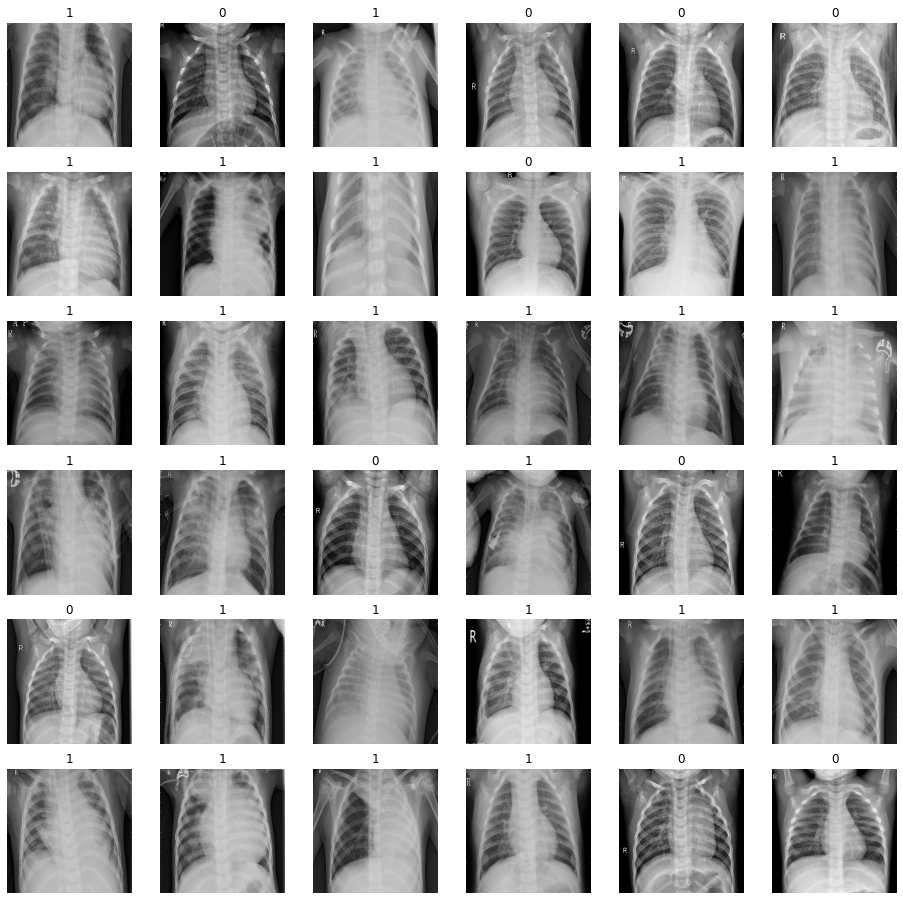

In [ ]:
labels = ['normal', 'Pneumonia']
#note: images are loaded only and not trained.
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,5000, 36):
    plt.subplot(6,6,j); j+=1
    plt.imshow(X[i], cmap = 'Greys')
    plt.axis('off')
    plt.title('{}'.format(y[i]))

In [ ]:
train_path = 'Downloads/data set/chest_xray/train'
valid_path = 'Downloads/data set/chest_xray/val'

In [ ]:
# from tensorflow.keras.applications import EfficientNetB0
# pt = EfficientNetB0(input_shape=IMAGE_SIZE + [3],
#              weights='imagenet', #imagenet is a 
#              include_top=False)

In [ ]:
# pt.trainable = False

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(k, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
data_gen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             preprocessing_function=tensorflow.keras.applications.vgg16.preprocess_input)

In [ ]:
gen_test = ImageDataGenerator(preprocessing_function=tensorflow.keras.applications.vgg16.preprocess_input)

In [ ]:
train_generator = data_gen.flow_from_directory(train_path,
                                              shuffle=True,
                                              target_size = IMAGE_SIZE,
                                              batch_size=BATCH_SIZE)

test_generator = gen_test.flow_from_directory(valid_path,
                                             target_size=IMAGE_SIZE,
                                             batch_size=BATCH_SIZE)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
m = model.fit_generator(train_generator,
                       validation_data=test_generator,
                       epochs=EPOCHS,
                       steps_per_epoch = int(np.ceil(len(train_generator) / BATCH_SIZE)),
                       validation_steps= int(np.ceil(len(test_generator) / BATCH_SIZE)))

Epoch 1/20
6/6 [==============================] - 174s 29s/step - loss: 63.0663 - accuracy: 0.5909 - val_loss: 0.7185 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 172s 29s/step - loss: 0.6412 - accuracy: 0.6370 - val_loss: 0.7035 - val_accuracy: 0.5000
Epoch 3/20
6/6 [==============================] - 171s 29s/step - loss: 0.6497 - accuracy: 0.6725 - val_loss: 0.9939 - val_accuracy: 0.5000
Epoch 4/20
6/6 [==============================] - 169s 28s/step - loss: 0.5878 - accuracy: 0.7768 - val_loss: 0.9252 - val_accuracy: 0.5000
Epoch 5/20
6/6 [==============================] - 170s 28s/step - loss: 0.6184 - accuracy: 0.7038 - val_loss: 0.7334 - val_accuracy: 0.5000
Epoch 6/20
6/6 [==============================] - 170s 28s/step - loss: 0.5828 - accuracy: 0.7512 - val_loss: 0.8492 - val_accuracy: 0.5000
Epoch 7/20
6/6 [==============================] - 175s 29s/step - loss: 0.5888 - accuracy: 0.7394 - val_loss: 0.7543 - val_accuracy: 0.5000
Epoch 8/20


KeyboardInterrupt: 